In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

In [7]:
mnist=fetch_openml("mnist_784",version=1,parser='auto')
mnist['data'][:20]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
mnist['target'][:10]

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [11]:
x=mnist['data']
y=mnist['target'].astype(np.int8) # changing target's dtype from category to int
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int8

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1729)

In [18]:
y_train
last_digit=y_train[:-1]
print("Last digit in the trianing dataset is",last_digit)

Last digit in the trianing dataset is 48632    6
32019    1
30105    3
67213    6
41473    4
        ..
1217     7
8507     8
54821    8
66803    5
68710    5
Name: class, Length: 48999, dtype: int8


In [24]:
digit_6_idx=(y_train==6)
digit_9_idx=(y_train==9)

digit_6_idx

48632     True
32019    False
30105    False
67213     True
41473    False
         ...  
8507     False
54821    False
66803    False
68710    False
1677     False
Name: class, Length: 49000, dtype: bool

In [29]:
x_train_69=np.vstack([x_train[digit_6_idx],x_train[digit_9_idx]])
y_train_69=np.hstack([np.ones(sum(digit_6_idx)),np.zeros(sum(digit_9_idx))])
x_test_69,y_test_69=shuffle(x_train_69,y_train_69,random_state=1729)

In [30]:
digit_6_idx_test = (y_test == 6)
digit_9_idx_test = (y_test == 9)

x_test_69 = np.vstack([x_test[digit_6_idx_test], x_test[digit_9_idx_test]])
y_test_69 = np.hstack([np.ones(sum(digit_6_idx_test)), np.zeros(sum(digit_9_idx_test))])
x_test_69, y_test_69 = shuffle(x_test_69, y_test_69, random_state=1729)

In [31]:
print("Sum of y_train_69 labels",np.sum(y_train_69))
print("Sum of y_test_69 labels",np.sum(y_test_69))

Sum of y_train_69 labels 4802.0
Sum of y_test_69 labels 2074.0


In [38]:
pipe=Pipeline([("scaler",StandardScaler()),("sgd",SGDClassifier(loss='log_loss',max_iter=10,tol=None,learning_rate='constant',eta0=0.01,random_state=1729))])
pipe.fit(x_train_69,y_train_69)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd',
                 SGDClassifier(eta0=0.01, learning_rate='constant',
                               loss='log_loss', max_iter=10, random_state=1729,
                               tol=None))])

In [46]:
loss_1,loss_2=[],[]
for eta, loss_list in [(0.01, loss_1), (0.000001, loss_2)]:
    clf_pipeline = Pipeline([('scaler', StandardScaler()),('sgd', SGDClassifier(loss='log_loss', max_iter=10, tol=None, random_state=10, learning_rate='constant', eta0=eta))])
    clf_pipeline.fit(x_train_69,y_train_69)
    for i in range(10):
        y_pred_proba=clf_pipeline.named_steps['sgd'].predict_proba(x_train_69)
        loss = log_loss(y_train_69, y_pred_proba)
        loss_list.append(loss)

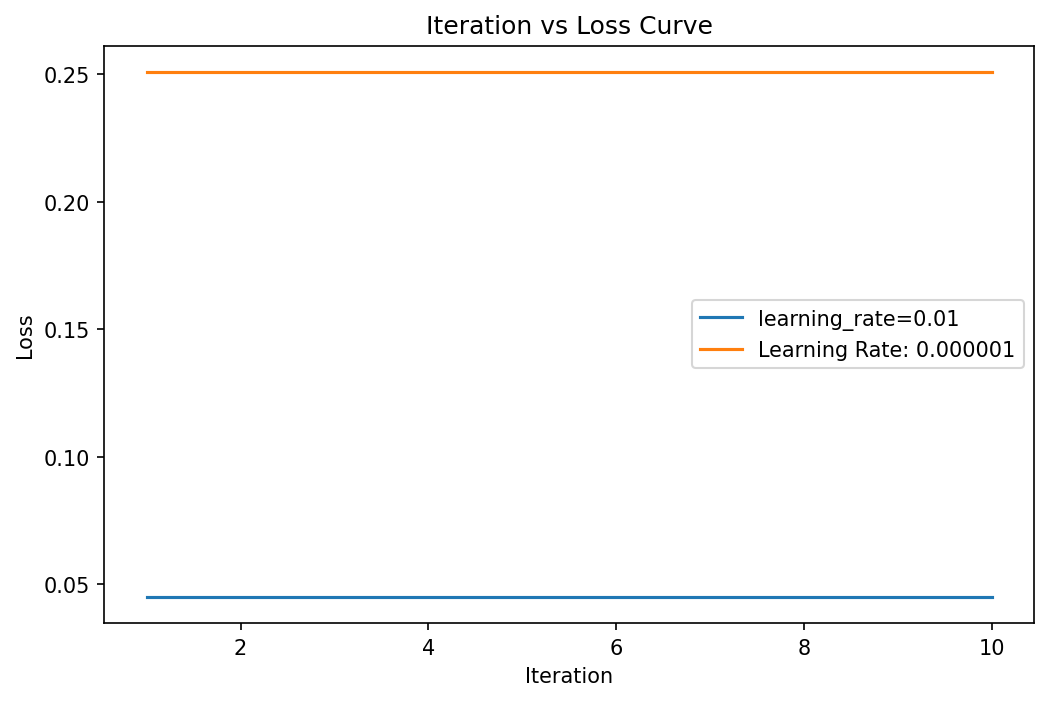

In [49]:
plt.figure(figsize=(8,5),dpi=150)
plt.plot(range(1,11),loss_1,label='learning_rate=0.01')
plt.plot(range(1, 11),loss_2, label='Learning Rate: 0.000001')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Iteration vs Loss Curve')
plt.legend()
plt.show()